In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cross_validation import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

np.random.seed(1234)

%matplotlib inline

In [7]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

## Objectives

* Consider only two features of the dataset obtained after t-sne
* Find out best performing value of perplexity for t-sne using cross-validation
* Use linear model with no calibration vs non linear model to see how well these perform

In [8]:
def get_training_set(train):
    X = train[train.columns.drop('Activity')]
    y = train.Activity
    
    return X, y

X, y = get_training_set(train)
Xtest = test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=44)

## Cross validation

In [32]:
def get_cross_val_scores_by_perplexity(X, y, clf):
    skf = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=43)
    perplexity = [50, 75, 100]
    errors = []
    
    for p in perplexity:
        tsne = TSNE(n_components=2, perplexity=p)
        Xhat = tsne.fit_transform(X)
        
        cv_scores = cross_val_score(clf, Xhat, y, scoring='log_loss', cv=skf, n_jobs=-1)
        errors.append(cv_scores.mean())
    
    perplexity = np.array(perplexity)
    errors = np.array(errors)
    
    return perplexity, errors

In [23]:
perplexity, errors = get_cross_val_scores_by_perplexity(X, y, LogisticRegression(C=1.))

In [26]:
errors = map(abs, errors)

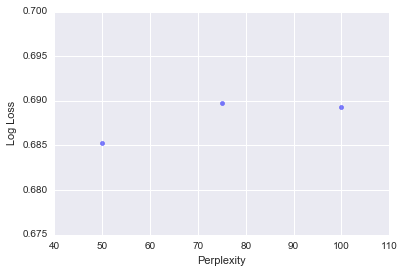

In [30]:
plt.scatter(perplexity, errors, color='b', alpha=0.5)
plt.xlabel('Perplexity')
plt.ylabel('Log Loss');

In [33]:
perplexity, errors = get_cross_val_scores_by_perplexity(X, y, RandomForestClassifier(n_jobs=-1))
errors = map(abs, errors)

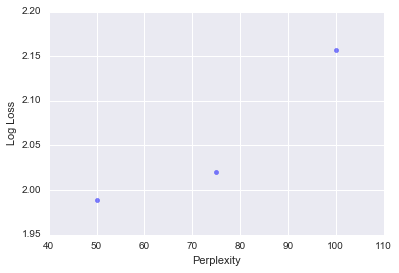

In [34]:
plt.scatter(perplexity, errors, color='b', alpha=0.5)
plt.xlabel('Perplexity')
plt.ylabel('Log Loss');